# Eye of the Emergency

Les plateformes de médias sociaux sont aujourd’hui devenues une partie intégrante de
nos vies, nous fournissant des informations en temps réel sur les événements qui se
produisent autour de nous. Toutefois, cet essor s'est accompagné d'une augmentation
de la désinformation et des "fake news". En cas de catastrophe ou de crise, ces fausses
informations peuvent être particulièrement dangereuses, car elles peuvent entraver les
efforts d'intervention d'urgence et provoquer la panique au sein de la population.

**Sommaire**
1. data 
1. EDA
1. algorithm 
1. conclusion 

## DATA

In [1]:
import pandas as pd
import missingno as msno 

from wordcloud import WordCloud as WC
import matplotlib.pyplot as plt

import nltk

In [2]:
df_test = pd.read_csv('test_tweets.csv', sep = ',')
df_train = pd.read_csv('train_tweets.csv', sep = ',')

In [3]:
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [4]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [6]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
df_test.isnull()

,id,keyword,location,text
0,False,True,True,False
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False
...,...,...,...,...
3258,False,True,True,False
3259,False,True,True,False
3260,False,True,True,False
3261,False,True,True,False


In [10]:
df_test.isnull()

,id,keyword,location,text
0,False,True,True,False
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False
...,...,...,...,...
3258,False,True,True,False
3259,False,True,True,False
3260,False,True,True,False
3261,False,True,True,False


In [11]:
df_test.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [12]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


étrange le résultat du describe il ne prend que en comte le int 

j'ai l'impression que les columns (keyword,	location) sont absente 

<AxesSubplot:>

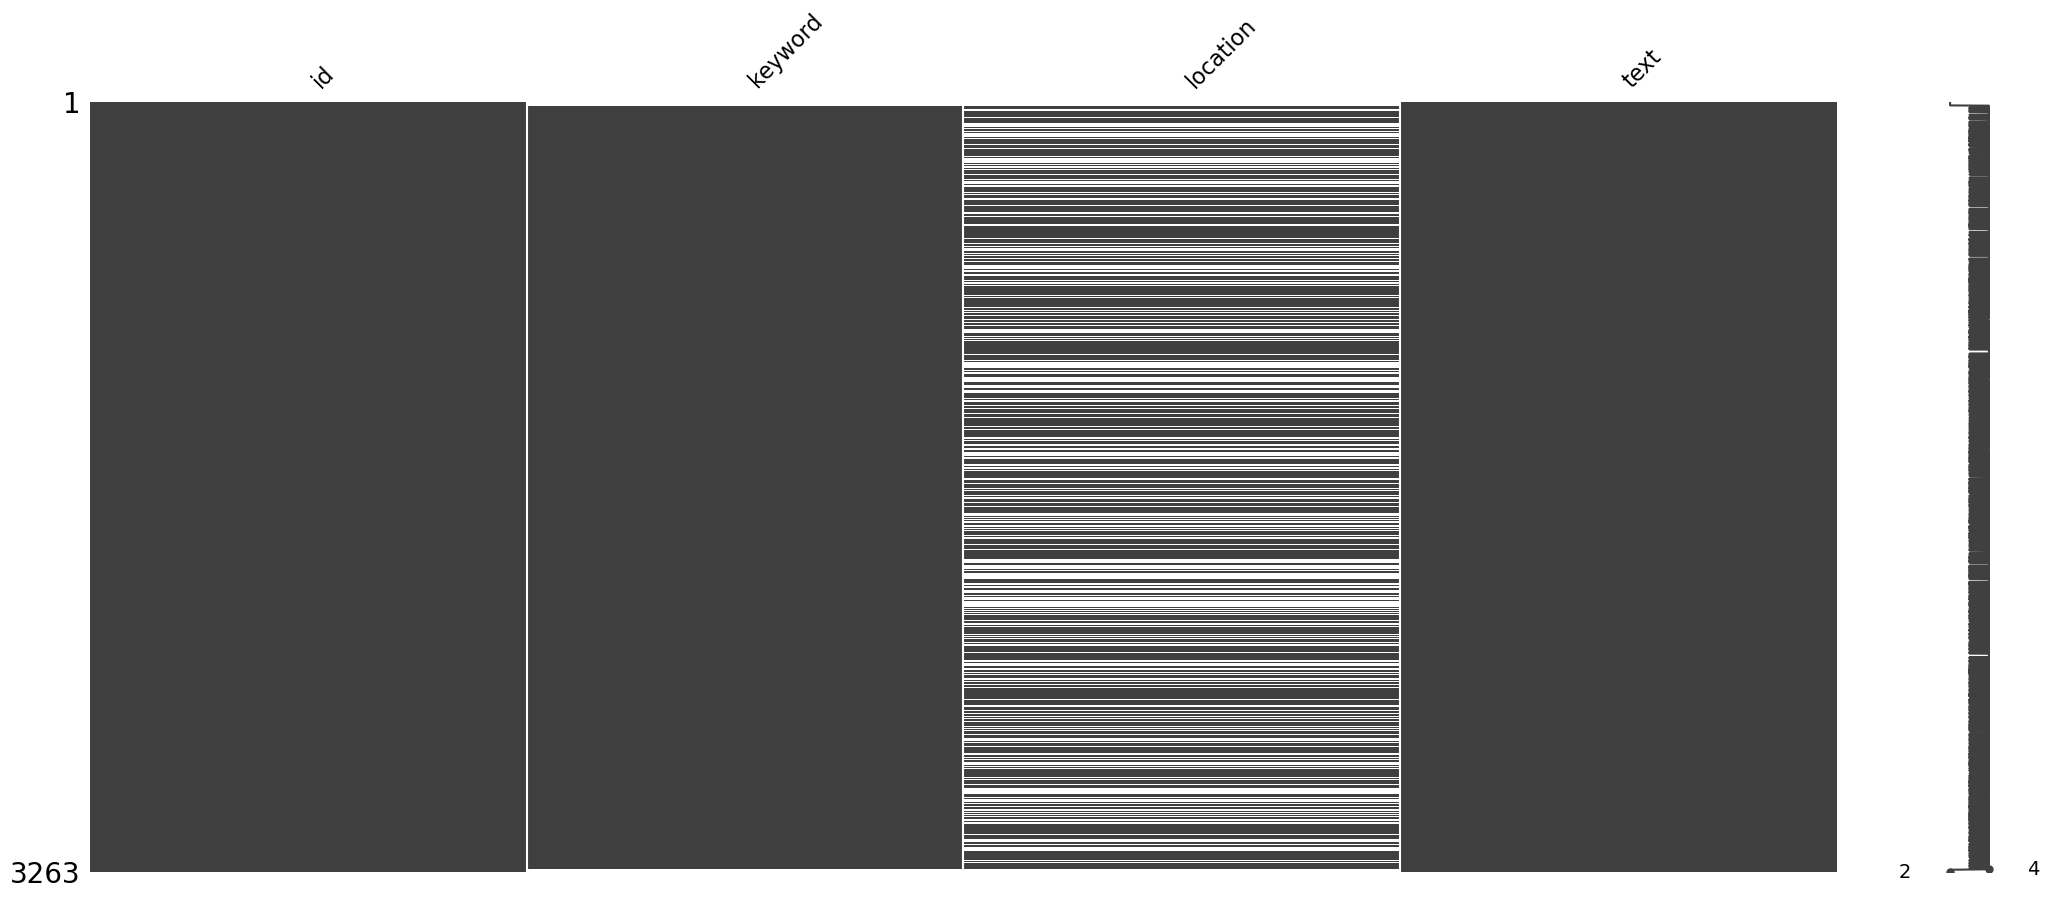

In [13]:
msno.matrix(df_test)

<AxesSubplot:>

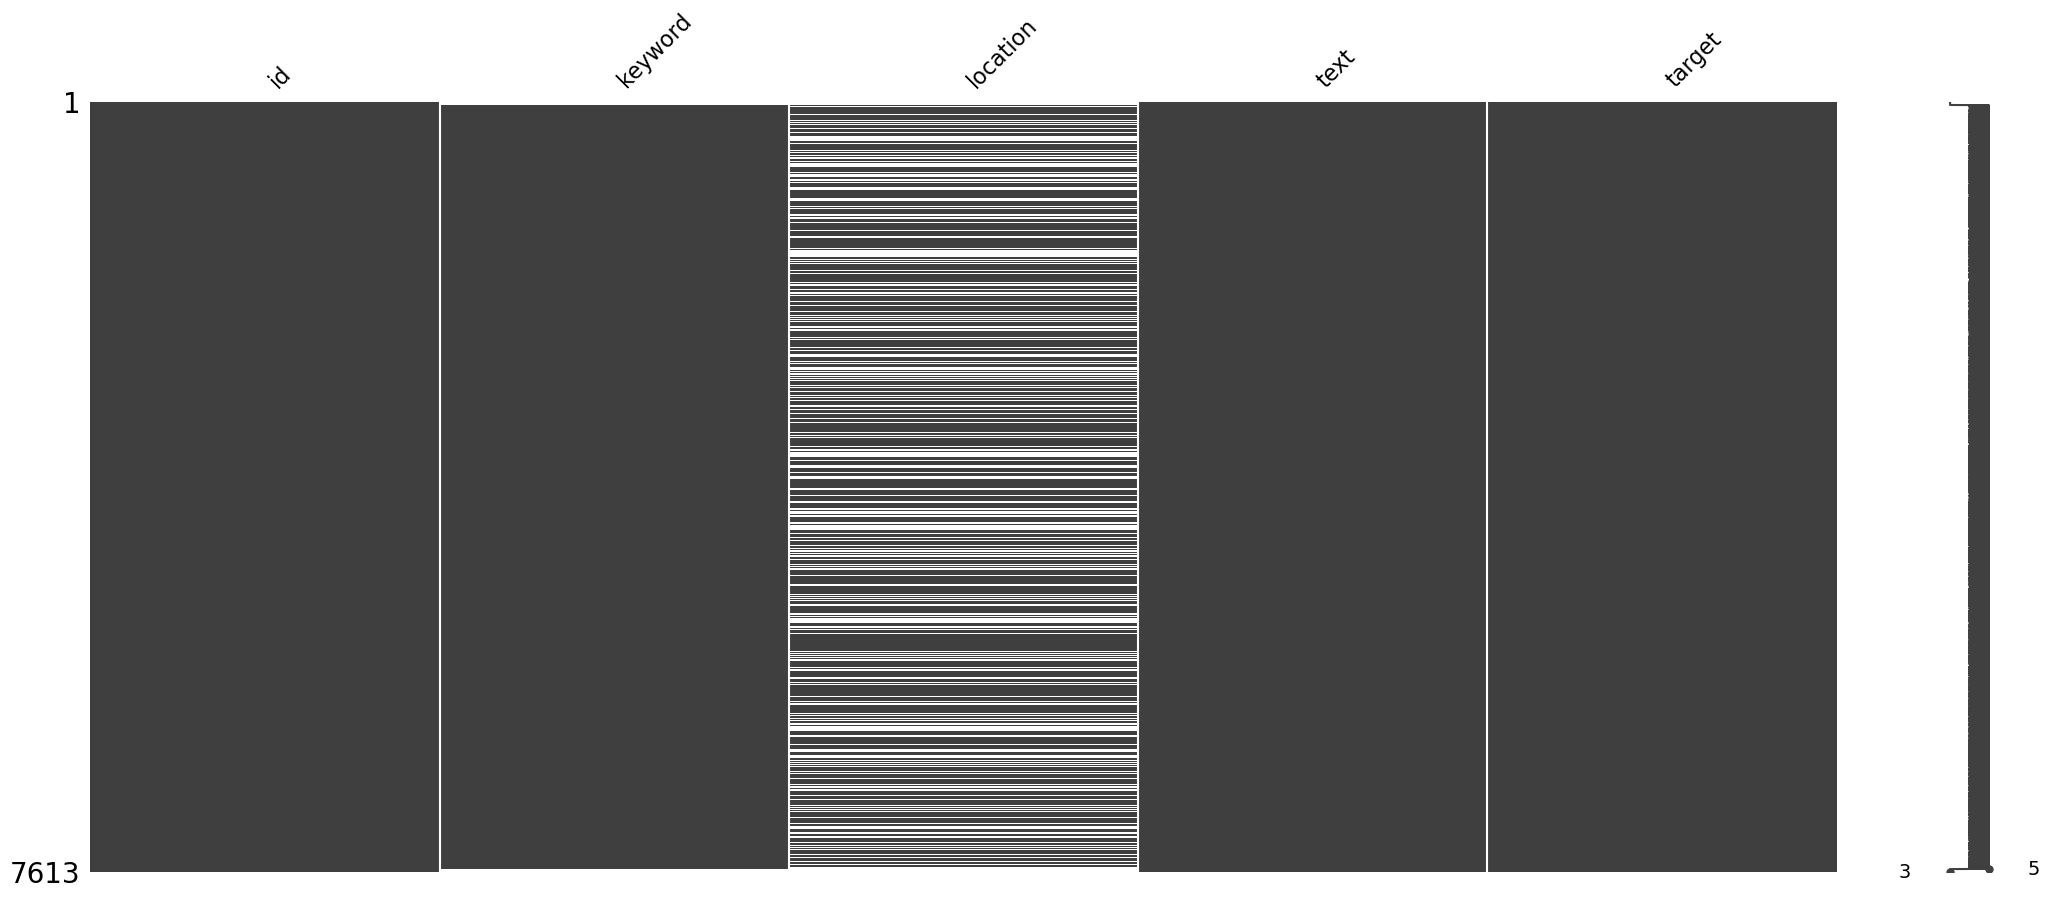

In [14]:
msno.matrix(df_train)

In [15]:
df_test.location.describe()

count         2158
unique        1602
top       New York
freq            38
Name: location, dtype: object

In [16]:
df_train.location.describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

créer l'objet WordCloud avec les paramètres souhaités

In [17]:
wordcloud = WC().generate(df_test.text.to_string())

### nuage de point 

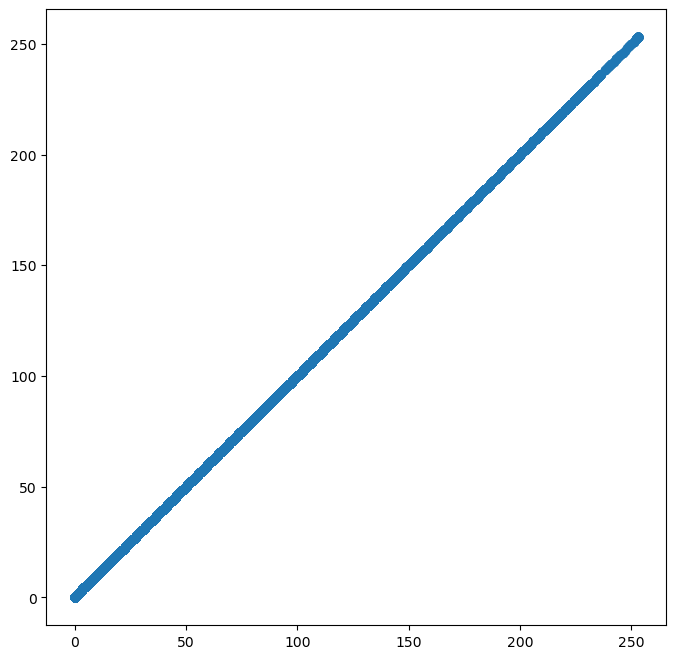

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(wordcloud, wordcloud)
plt.show()

### Graphique en barres

In [19]:
# data1 = df_test.text.items()
data1 = list(df_test.text.items())

In [20]:
for i in range(len(data1)):
    data1[i] = (data1[i][0], data1[i][1].replace('@', ' '))

In [21]:
data1 = sorted(data1, key=lambda x: x[1], reverse=True)

In [22]:
labels = [d[0] for d in data1]
values = [d[1] for d in data1]

In [23]:
plt.bar(labels, values)

plt.xticks(rotation=90)
plt.ylabel('Fréquence')
plt.xlabel('Mots')

plt.show()

C:\Users\PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'default' does not have a glyph for '\x89' [U+89], substituting with a dummy symbol.


ValueError: 
#LMÛªs  frauncestavern named one of the historic properties granted $$ by  NYGovCuomo to repair #Sandy damage http://t.co/OcAdC8vFyF
                                                                     ^
Expected end of text, found '$'  (at char 69), (line:1, col:70)

<Figure size 640x480 with 1 Axes>